In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import os
import csv
import datetime as dt
from datetime import date
import pandas_profiling
import glob
from IPython.display import HTML
import warnings
import matplotlib.font_manager
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import pyarrow
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

### Cambia Path

In [56]:
path='/mnt/work/Esstefania' ##path files
cwd = os.getcwd() ##get actual directory
os.chdir(path) ## change directory
os.listdir() ## list all files in new directory

['Clientes_Credivillas_activos_unicos',
 'Review_Creditos_Clientes.ipynb',
 'Credito_Credivillas_total_clientes_fecha',
 '.ipynb_checkpoints',
 'Credivillas_total_clientes_fecha',
 'cliente_parquet',
 'Review_Creditos_Clientes-Copy1.ipynb',
 'Credivillas_total_clientes_activos',
 'credito_parquet',
 'Analisis_Variable_Target.ipynb',
 'Review_Creditos_credivillas.ipynb']

### Lee base de credivillas de clientes que al menos tienen un credito activo

In [3]:
#%%time
path='/mnt/work/Esstefania'
file='Credivillas_total_clientes_activos'
Credivillas_total_clientes_activos=pd.read_parquet(os.path.join(path,file))

In [4]:
Credivillas_total_clientes_activos.sort_values('ID_CONTRATO_HASHED').head(5)

,ID_CLIENTE_HASHED,TIPO_IDEN,OFIC_RADI,LINEA_CART,ID_CONTRATO_HASHED,FEC_DESE,FEC_FINAL,FEC_REFINAN,FEC_RPRTE,ESTADO,COD_MON,PRES_PESO,SD_CAP_UPAC,APROB_UPAC,UPAC_DESE,PLAZO,PERIODO_PLAZO,TASA_BASE,TASA_INTE,MODALIDAD_INT,DIAS_MORA,CUOT_MORA,CLAS_CART,DIA_VENCI,ENTIDAD_ORIGEN,ENTIDAD,APLICACION,SD_TOT_DEUDA,SD_CAP_LIBR,CALIFICACION_DEF,MOT_CAL,FEC_CAL_DEF,PROB_TOTAL,Fecha
8675062,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201808
8675041,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201804
8675034,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201803
8675031,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201802
8675024,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201801


### Ejemplo

In [ ]:
Credivillas_total_clientes_activos[Credivillas_total_clientes_activos['ID_CLIENTE_HASHED']=='36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea']

### Creditos Activos por mes

In [5]:
Credivillas_total_clientes_activos[Credivillas_total_clientes_activos['ESTADO']=="A"].groupby('Fecha')['LINEA_CART'].count()

Fecha
201704    222673
201705    223924
201706    223935
201707    224790
201708    225626
201709    226291
201710    227122
201711    228080
201712    228237
201801    227929
201802    229194
201803    229829
201804    230138
201805    230671
201806    207117
201807    207643
201808    208379
201809    208915
201810    209125
201811    209631
201812    208749
201901    208047
201902    207053
201903    206269
201904    205321
Name: LINEA_CART, dtype: int64

### Clientes con al créditos Activos por mes

In [6]:
Credivillas_total_clientes_activos[Credivillas_total_clientes_activos['ESTADO']=="A"][['ID_CLIENTE_HASHED','TIPO_IDEN','Fecha']]\
                                  .drop_duplicates().groupby('Fecha')['ID_CLIENTE_HASHED'].count()

Fecha
201704    217584
201705    218795
201706    218767
201707    219653
201708    220538
201709    221197
201710    222073
201711    223054
201712    223230
201801    223005
201802    224289
201803    225004
201804    225312
201805    225877
201806    202643
201807    203211
201808    204022
201809    204644
201810    204953
201811    205522
201812    204730
201901    204083
201902    203165
201903    202435
201904    201567
Name: ID_CLIENTE_HASHED, dtype: int64

### Filtra creditos en Mora>30 días

In [7]:
Credivillas_total_clientes_activos_filtro=Credivillas_total_clientes_activos[Credivillas_total_clientes_activos['DIAS_MORA']<30].copy()

#### Creditos sin mora activos por mes

In [8]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"]\
                                        .groupby('Fecha')['LINEA_CART'].count()

Fecha
201704    175798
201705    173112
201706    175454
201707    173641
201708    174026
201709    175910
201710    173630
201711    175570
201712    173485
201801    172523
201802    174368
201803    171959
201804    173738
201805    172606
201806    173299
201807    172465
201808    172784
201809    173242
201810    171875
201811    172015
201812    169911
201901    168300
201902    166809
201903    164265
201904    163266
Name: LINEA_CART, dtype: int64

#### Clientes sin mora activos por mes

In [9]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"]\
                                         [['ID_CLIENTE_HASHED','TIPO_IDEN','Fecha']].drop_duplicates()\
                                         .groupby('Fecha')['ID_CLIENTE_HASHED'].count()

Fecha
201704    171269
201705    168637
201706    170865
201707    169146
201708    169574
201709    171396
201710    169223
201711    171153
201712    169119
201801    168245
201802    170083
201803    167812
201804    169541
201805    168488
201806    169221
201807    168454
201808    168847
201809    169393
201810    168138
201811    168341
201812    166359
201901    164809
201902    163391
201903    160924
201904    159991
Name: ID_CLIENTE_HASHED, dtype: int64

### Creación de variables necesarias para target

In [10]:
## Tasa mensual
Credivillas_total_clientes_activos_filtro['Tasa_Mensual']=((1+Credivillas_total_clientes_activos_filtro['TASA_INTE'])**(1/12))-1

## Cuota calculada
Credivillas_total_clientes_activos_filtro['Cuota_cal']=((Credivillas_total_clientes_activos_filtro['PRES_PESO']\
                                                        *(Credivillas_total_clientes_activos_filtro['Tasa_Mensual']\
                                                          *(1+Credivillas_total_clientes_activos_filtro['Tasa_Mensual'])\
                                                          **Credivillas_total_clientes_activos_filtro['PLAZO']))/\
                                                        (((1+Credivillas_total_clientes_activos_filtro['Tasa_Mensual'])\
                                                          **Credivillas_total_clientes_activos_filtro['PLAZO'])-1))

## Plazo Remanente
Credivillas_total_clientes_activos_filtro['Plazo_Remanente']=Credivillas_total_clientes_activos_filtro['PLAZO']-\
(((Credivillas_total_clientes_activos_filtro['Fecha'].astype('str').str.slice(0,4).astype('int')-\
Credivillas_total_clientes_activos_filtro['FEC_DESE'].astype('str').str.slice(0,4).astype('int'))*12)+\
(Credivillas_total_clientes_activos_filtro['Fecha'].astype('str').str.slice(4,6).astype('int')-\
Credivillas_total_clientes_activos_filtro['FEC_DESE'].astype('str').str.slice(4,6).astype('int')))

## Flags monto y plazo
Credivillas_total_clientes_activos_filtro['FLAG_PLAZO']=np.where(Credivillas_total_clientes_activos_filtro['Plazo_Remanente']>=6,1,0)
Credivillas_total_clientes_activos_filtro['FLAG_MONTO']=np.where(Credivillas_total_clientes_activos_filtro['SD_TOT_DEUDA']>=\
                                                                 6*Credivillas_total_clientes_activos_filtro['Cuota_cal'],1,0)

## Estado Rezagado
Credivillas_total_clientes_activos_filtro.sort_values(by=['ID_CONTRATO_HASHED','Fecha'], ascending=True, inplace=True)
Credivillas_total_clientes_activos_filtro['ESTADO_LAG1']=Credivillas_total_clientes_activos_filtro['ESTADO'].shift(-1)
Credivillas_total_clientes_activos_filtro.tail()

,ID_CLIENTE_HASHED,TIPO_IDEN,OFIC_RADI,LINEA_CART,ID_CONTRATO_HASHED,FEC_DESE,FEC_FINAL,FEC_REFINAN,FEC_RPRTE,ESTADO,COD_MON,PRES_PESO,SD_CAP_UPAC,APROB_UPAC,UPAC_DESE,PLAZO,PERIODO_PLAZO,TASA_BASE,TASA_INTE,MODALIDAD_INT,DIAS_MORA,CUOT_MORA,CLAS_CART,DIA_VENCI,ENTIDAD_ORIGEN,ENTIDAD,APLICACION,SD_TOT_DEUDA,SD_CAP_LIBR,CALIFICACION_DEF,MOT_CAL,FEC_CAL_DEF,PROB_TOTAL,Fecha,Tasa_Mensual,Cuota_cal,Plazo_Remanente,FLAG_PLAZO,FLAG_MONTO,ESTADO_LAG1
7484856,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201812,0.0160,452953.0239,-14,0,0,C
7484859,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201901,0.0160,452953.0239,-15,0,0,C
7484861,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201902,0.0160,452953.0239,-16,0,0,C
7484866,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201903,0.0160,452953.0239,-17,0,0,C
7484868,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201904,0.0160,452953.0239,-18,0,0,NaN


In [11]:
Credivillas_total_clientes_activos_filtro.dtypes

ID_CLIENTE_HASHED     object 
TIPO_IDEN             object 
OFIC_RADI             int64  
LINEA_CART            int64  
ID_CONTRATO_HASHED    object 
FEC_DESE              int64  
FEC_FINAL             int64  
FEC_REFINAN           int64  
FEC_RPRTE             int64  
ESTADO                object 
COD_MON               int64  
PRES_PESO             float64
SD_CAP_UPAC           float64
APROB_UPAC            float64
UPAC_DESE             float64
PLAZO                 int64  
PERIODO_PLAZO         object 
TASA_BASE             object 
TASA_INTE             float64
MODALIDAD_INT         object 
DIAS_MORA             int64  
CUOT_MORA             int64  
CLAS_CART             object 
DIA_VENCI             int64  
ENTIDAD_ORIGEN        object 
ENTIDAD               object 
APLICACION            object 
SD_TOT_DEUDA          float64
SD_CAP_LIBR           float64
CALIFICACION_DEF      object 
MOT_CAL               object 
FEC_CAL_DEF           int64  
PROB_TOTAL            float64
Fecha     

### Creación de target churn

In [12]:
Credivillas_total_clientes_activos_filtro['Churn']=np.where((Credivillas_total_clientes_activos_filtro['ID_CONTRATO_HASHED']==\
                                                             Credivillas_total_clientes_activos_filtro['ID_CONTRATO_HASHED']\
                                                             .shift(-1))&\
                                                            (Credivillas_total_clientes_activos_filtro['ESTADO_LAG1']=="C")&\
                                                            (Credivillas_total_clientes_activos_filtro['ESTADO']=="A") & \
                                                            ((Credivillas_total_clientes_activos_filtro['FLAG_PLAZO']==1)|\
                                                             (Credivillas_total_clientes_activos_filtro['FLAG_MONTO']==1)),1,0)
Credivillas_total_clientes_activos_filtro.tail()

,ID_CLIENTE_HASHED,TIPO_IDEN,OFIC_RADI,LINEA_CART,ID_CONTRATO_HASHED,FEC_DESE,FEC_FINAL,FEC_REFINAN,FEC_RPRTE,ESTADO,COD_MON,PRES_PESO,SD_CAP_UPAC,APROB_UPAC,UPAC_DESE,PLAZO,PERIODO_PLAZO,TASA_BASE,TASA_INTE,MODALIDAD_INT,DIAS_MORA,CUOT_MORA,CLAS_CART,DIA_VENCI,ENTIDAD_ORIGEN,ENTIDAD,APLICACION,SD_TOT_DEUDA,SD_CAP_LIBR,CALIFICACION_DEF,MOT_CAL,FEC_CAL_DEF,PROB_TOTAL,Fecha,Tasa_Mensual,Cuota_cal,Plazo_Remanente,FLAG_PLAZO,FLAG_MONTO,ESTADO_LAG1,Churn
7484856,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201812,0.0160,452953.0239,-14,0,0,C,0
7484859,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201901,0.0160,452953.0239,-15,0,0,C,0
7484861,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201902,0.0160,452953.0239,-16,0,0,C,0
7484866,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201903,0.0160,452953.0239,-17,0,0,C,0
7484868,528d86b03b8f3a037758fdb5a10a8c76e053add82bde5b17475096e1ec1e32ae,C,911,320,fffffae201058aeb3025a3aba3bd8451ba84c8ca6bb48457fc90554aa272ece6,20131010,20171017,0,20131010,C,8,15082824.0000,0.0000,0.0000,0.0000,48,M,SIN,0.2104,V,0,0,CN,17,V,BC,KV,0.0000,0.0000,A,T,20131010,0.0000,201904,0.0160,452953.0239,-18,0,0,NaN,0


### Variable cancelación al mes

In [22]:
Credivillas_total_clientes_activos_filtro['Cancelación']=np.where((Credivillas_total_clientes_activos_filtro['ID_CONTRATO_HASHED']==\
                                                                   Credivillas_total_clientes_activos_filtro['ID_CONTRATO_HASHED'].shift(-1))&\
                                                            (Credivillas_total_clientes_activos_filtro['ESTADO_LAG1']=="C")&\
                                                            (Credivillas_total_clientes_activos_filtro['ESTADO']=="A"),1,0)
Credivillas_total_clientes_activos_filtro.sort_values(['ID_CONTRATO_HASHED','Fecha'], ascending=True, inplace=True)
Credivillas_total_clientes_activos_filtro.head()

,ID_CLIENTE_HASHED,TIPO_IDEN,OFIC_RADI,LINEA_CART,ID_CONTRATO_HASHED,FEC_DESE,FEC_FINAL,FEC_REFINAN,FEC_RPRTE,ESTADO,COD_MON,PRES_PESO,SD_CAP_UPAC,APROB_UPAC,UPAC_DESE,PLAZO,PERIODO_PLAZO,TASA_BASE,TASA_INTE,MODALIDAD_INT,DIAS_MORA,CUOT_MORA,CLAS_CART,DIA_VENCI,ENTIDAD_ORIGEN,ENTIDAD,APLICACION,SD_TOT_DEUDA,SD_CAP_LIBR,CALIFICACION_DEF,MOT_CAL,FEC_CAL_DEF,PROB_TOTAL,Fecha,Tasa_Mensual,Cuota_cal,Plazo_Remanente,FLAG_PLAZO,FLAG_MONTO,ESTADO_LAG1,Churn,Intervalos_Saldo_rep,Churn_SD_TOT_DEUDA,Intervalos_Plazo_Remanente,Cancelación
8674981,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201704,0.0084,521450.6845,32,1,0,C,0,1. <1mll,0.0000,12. 1mes,0
8674983,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201705,0.0084,521450.6845,31,1,0,C,0,1. <1mll,0.0000,12. 1mes,0
8674991,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201706,0.0084,521450.6845,30,1,0,C,0,1. <1mll,0.0000,12. 1mes,0
8674997,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201707,0.0084,521450.6845,29,1,0,C,0,1. <1mll,0.0000,12. 1mes,0
8674999,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201708,0.0084,521450.6845,28,1,0,C,0,1. <1mll,0.0000,12. 1mes,0


### ejemplo

In [ ]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ID_CONTRATO_HASHED']=='0000088e50ff1bb16b485b8b6aebb989babb29bcfd5a6d1f0a72131fea747b46']

### Excluir registros cerrados por mes

In [49]:
## Excluir registros cerrados
churn_final=Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"].copy()
churn_final.head()

,ID_CLIENTE_HASHED,TIPO_IDEN,OFIC_RADI,LINEA_CART,ID_CONTRATO_HASHED,FEC_DESE,FEC_FINAL,FEC_REFINAN,FEC_RPRTE,ESTADO,COD_MON,PRES_PESO,SD_CAP_UPAC,APROB_UPAC,UPAC_DESE,PLAZO,PERIODO_PLAZO,TASA_BASE,TASA_INTE,MODALIDAD_INT,DIAS_MORA,CUOT_MORA,CLAS_CART,DIA_VENCI,ENTIDAD_ORIGEN,ENTIDAD,APLICACION,SD_TOT_DEUDA,SD_CAP_LIBR,CALIFICACION_DEF,MOT_CAL,FEC_CAL_DEF,PROB_TOTAL,Fecha,Tasa_Mensual,Cuota_cal,Plazo_Remanente,FLAG_PLAZO,FLAG_MONTO,ESTADO_LAG1,Churn,Intervalos_Saldo_rep,Churn_SD_TOT_DEUDA,Intervalos_Plazo_Remanente,Cancelación,Intervalos_Plazo,Cancela_SD_TOT_DEUDA
10124973,29d97592e97006c78849ef5cd42a7d2b72ccd71c0d70ed72fb0daa6feb0aa2e0,C,530,320,0000088e50ff1bb16b485b8b6aebb989babb29bcfd5a6d1f0a72131fea747b46,20170802,20220816,0,20170802,A,8,134142999.0000,0.0000,0.0000,0.0000,60,M,SIN,0.1410,V,0,0,CN,16,V,BC,KV,135533211.0000,134223042.0000,A,T,20170802,0.0388,201708,0.0111,3070274.3519,60,1,1,A,0,15. 50mll>,0.0000,12. 12meses,0,6. 72meses,0.0000
10124976,29d97592e97006c78849ef5cd42a7d2b72ccd71c0d70ed72fb0daa6feb0aa2e0,C,530,320,0000088e50ff1bb16b485b8b6aebb989babb29bcfd5a6d1f0a72131fea747b46,20170802,20220816,0,20170802,A,8,134142999.0000,0.0000,0.0000,0.0000,60,M,SIN,0.1410,V,0,0,CN,16,V,BC,KV,133275183.0000,132591285.0000,A,T,20170802,0.0388,201709,0.0111,3070274.3519,59,1,1,A,0,15. 50mll>,0.0000,12. 12meses,0,6. 72meses,0.0000
10124980,29d97592e97006c78849ef5cd42a7d2b72ccd71c0d70ed72fb0daa6feb0aa2e0,C,530,320,0000088e50ff1bb16b485b8b6aebb989babb29bcfd5a6d1f0a72131fea747b46,20170802,20220816,0,20170802,A,8,134142999.0000,0.0000,0.0000,0.0000,60,M,SIN,0.1410,V,0,0,CN,16,V,BC,KV,131661290.0000,130985674.0000,A,T,20170802,0.0388,201710,0.0111,3070274.3519,58,1,1,C,1,15. 50mll>,131661290.0000,12. 12meses,1,6. 72meses,131661290.0000
12521362,5cbeb81f9fbbfdb2247dc65ec7ee5f73e1bda5153f47ef03f99512f6c7e4adef,C,422,320,00002ee7ac1c4ecdcac019f122e4927652abf2f62e1f948ed12d23fb8a3167ea,20180724,20230816,0,20180725,A,8,31545000.0000,0.0000,0.0000,0.0000,60,M,SIN,0.2276,V,0,0,CN,16,V,BC,KV,31672625.0000,31563823.0000,A,T,20180725,0.0388,201807,0.0172,847770.6427,60,1,1,A,0,15. 30-50mll,0.0000,12. 12meses,0,6. 72meses,0.0000
12521363,5cbeb81f9fbbfdb2247dc65ec7ee5f73e1bda5153f47ef03f99512f6c7e4adef,C,422,320,00002ee7ac1c4ecdcac019f122e4927652abf2f62e1f948ed12d23fb8a3167ea,20180724,20230816,0,20180725,A,8,31545000.0000,0.0000,0.0000,0.0000,60,M,SIN,0.2276,V,0,-1,CN,16,V,BC,KV,24876377.0000,25344858.0000,A,T,20180725,0.0388,201808,0.0172,847770.6427,59,1,1,A,0,14. 20-30mll,0.0000,12. 12meses,0,6. 72meses,0.0000


### Counts por Fecha de churn

In [14]:
churn_final.groupby('Fecha').agg({'Churn':[('Total_churn','sum'),('Total','count')]})

Churn        
       Total_churn   Total
Fecha                     
201704  5548        175798
201705  4293        173112
201706  4714        175454
201707  5017        173641
201708  4413        174026
201709  5142        175910
201710  4589        173630
201711  4028        175570
201712  3771        173485
201801  4007        172523
201802  4532        174368
201803  4387        171959
201804  4529        173738
201805  3678        172606
201806  3880        173299
201807  4738        172465
201808  4381        172784
201809  4760        173242
201810  3988        171875
201811  4045        172015
201812  3805        169911
201901  4178        168300
201902  4124        166809
201903  4132        164265
201904  0           163266

#### Clientes con Churn

In [16]:
pd.DataFrame(pd.DataFrame(churn_final.groupby(['Fecha','ID_CLIENTE_HASHED','TIPO_IDEN'])['Churn'].max())
             .groupby('Fecha')['Churn'].sum())

,Churn
Fecha,
201704,5465
201705,4239
201706,4632
201707,4934
201708,4347
201709,5059
201710,4514
201711,3972
201712,3719


### Counts por Fecha de Cancelados

In [50]:
churn_final.groupby('Fecha').agg({'Cancelación':[('Total_cancelaciones','sum'),('Total','count')]})

Cancelación        
       Total_cancelaciones   Total
Fecha                             
201704  7252                175798
201705  5893                173112
201706  6499                175454
201707  6862                173641
201708  6061                174026
201709  6790                175910
201710  6191                173630
201711  5654                175570
201712  5187                173485
201801  5398                172523
201802  6036                174368
201803  5948                171959
201804  6160                173738
201805  5144                172606
201806  5568                173299
201807  6481                172465
201808  6027                172784
201809  6760                173242
201810  5682                171875
201811  5933                172015
201812  5319                169911
201901  5616                168300
201902  5815                166809
201903  5712                164265
201904  0                   163266

#### Clientes con cancelación

In [51]:
pd.DataFrame(pd.DataFrame(churn_final.groupby(['Fecha','ID_CLIENTE_HASHED','TIPO_IDEN'])['Cancelación'].max())
             .groupby('Fecha')['Cancelación'].sum())

,Cancelación
Fecha,
201704,7156
201705,5827
201706,6409
201707,6770
201708,5982
201709,6700
201710,6105
201711,5592
201712,5131


## Análisis  por Saldo representativo

In [17]:
Credivillas_total_clientes_activos_filtro['Intervalos_Saldo_rep']=\
pd.cut(Credivillas_total_clientes_activos_filtro.SD_TOT_DEUDA, bins=[-10000000, 1000000, 2000000,3000000, 4000000, 5000000, 6000000, 
                                                                     7000000,8000000,9000000,10000000, 12000000, 15000000, 
                                                                     20000000, 30000000, 50000000 , 100000000000], 
                             labels=['1. <1mll', '2. 1-2mll','3. 2-3mll','4. 3-4mll','5. 4-5mll', '6. 5-6mll', '7. 6-7mll',\
                                     '8. 7-8mll', '9. 8-9mll', '10. 9-10mll', '11. 10-12mll', '12. 12-15mll','13. 15-20mll',\
                                     '14. 20-30mll', '15. 30-50mll' ,'15. 50mll>'])

In [18]:
Credivillas_total_clientes_activos_filtro['Intervalos_Saldo_rep'].value_counts()

1. <1mll        7840589
2. 1-2mll       436291 
3. 2-3mll       400487 
4. 3-4mll       336152 
5. 4-5mll       313839 
6. 5-6mll       276494 
14. 20-30mll    273953 
13. 15-20mll    264949 
12. 12-15mll    254058 
11. 10-12mll    250461 
7. 6-7mll       233216 
15. 30-50mll    227312 
8. 7-8mll       204011 
9. 8-9mll       180161 
15. 50mll>      170259 
10. 9-10mll     169603 
Name: Intervalos_Saldo_rep, dtype: int64

In [44]:
Credivillas_total_clientes_activos_filtro['Churn_SD_TOT_DEUDA']=Credivillas_total_clientes_activos_filtro['Churn']*\
Credivillas_total_clientes_activos_filtro['SD_TOT_DEUDA']
Credivillas_total_clientes_activos_filtro['Cancela_SD_TOT_DEUDA']=Credivillas_total_clientes_activos_filtro['Cancelación']*\
Credivillas_total_clientes_activos_filtro['SD_TOT_DEUDA']

In [20]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"]\
                                        .pivot_table(index='Fecha', columns='Intervalos_Saldo_rep', values=['Churn',\
                                        'SD_TOT_DEUDA', 'Churn_SD_TOT_DEUDA'], aggfunc=['sum','count'])


sum                                          \
                        Churn                                           
Intervalos_Saldo_rep 1. <1mll 2. 1-2mll 3. 2-3mll 4. 3-4mll 5. 4-5mll   
Fecha                                                                   
201704                1216     743       684       416       282        
201705                1040     646       478       287       265        
201706                1124     693       526       339       265        
201707                1074     691       544       374       340        
201708                1004     639       449       355       276        
201709                1137     689       563       394       341        
201710                1023     654       484       350       282        
201711                1127     524       400       271       244        
201712                997      459       384       224       220        
201801                895      459       369       272       246        
201802                1047     559       448       314       248        
201803                1021     504       438       291       276        
201804                988      584       418       340       302        
201805                967      414       277       257       203        
201806                1064     481       353       282       223        
201807                1002     508       386       300       280        
201808                923      490       388       344       299        
201809                1034     585       417       385       341        
201810                960      418       386       293       234        
201811                1054     466       346       310       229        
201812                983      405       357       277       255        
201901                878      426       380       281       267        
201902                938      424       361       274       268        
201903                860      423       348       299       283        
201904                0        0         0         0         0          

                                                                          \
                                                                           
Intervalos_Saldo_rep 6. 5-6mll 7. 6-7mll 8. 7-8mll 9. 8-9mll 10. 9-10mll   
Fecha                                                                      
201704                249       199       192       155       162          
201705                195       143       145       98        115          
201706                211       179       141       141       129          
201707                283       209       164       141       133          
201708                201       200       140       128       120          
201709                273       231       162       153       141          
201710                245       204       180       140       131          
201711                168       143       118       119       102          
201712                186       155       109       128       91           
201801                214       176       148       127       126          
201802                240       170       161       130       136          
201803                253       182       153       141       127          
201804                234       191       162       128       129          
201805                204       139       127       125       97           
201806                186       164       99        88        83           
201807                266       264       189       167       159          
201808                240       203       173       134       147          
201809                232       194       171       144       145          
201810                233       143       163       110       109          
201811                188       157       125       132       114          
201812                200       155       128       117       87           
201901  

In [47]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"]\
                                        .pivot_table(index='Fecha', columns='Intervalos_Saldo_rep', values=['Cancelación','Churn',\
                                        'SD_TOT_DEUDA', 'Churn_SD_TOT_DEUDA','Cancela_SD_TOT_DEUDA'], \
                                                     aggfunc={'Churn': ['sum','count'],\
                                                     'SD_TOT_DEUDA': 'sum',\
                                                     'Churn_SD_TOT_DEUDA':'sum',\
                                                     'Cancelación':'sum', \
                                                     'Cancela_SD_TOT_DEUDA':'sum'}, fill_value=0)


Cancela_SD_TOT_DEUDA                                      \
                                      sum                                       
Intervalos_Saldo_rep             1. <1mll   2. 1-2mll   3. 2-3mll   4. 3-4mll   
Fecha                                                                           
201704                793970096            1245479892  1765110420  1462960663   
201705                662625195            1103744464  1254932616  1030995299   
201706                760954873            1199539965  1402355089  1208492566   
201707                731807990            1200003269  1451768538  1367644198   
201708                666724877            1107654672  1204425648  1266220213   
201709                709067460            1183646202  1481375190  1412170849   
201710                659751998            1141924434  1274651090  1251278735   
201711                694114529            902931746   1051980300  992049392    
201712                609367576            812965143   1022197434  826808979    
201801                608413264            816707330   1018375786  999975184    
201802                660221486            947920037   1169473784  1139804844   
201803                631024884            888907504   1166053184  1073658463   
201804                673497585            1046835804  1088043764  1228853595   
201805                623679650            774082139   767184889   956557013    
201806                704548448            905195741   993668062   1038810704   
201807                703790851            944433033   1040354134  1114248492   
201808                652611576            903563347   1088083750  1257224935   
201809                777067945            1080078215  1166678113  1411730034   
201810                664641784            805958146   1073837505  1076954593   
201811                760677374            908455359   967378496   1124035748   
201812                673142845            757793347   979674652   982861937    
201901                600099679            789023077   1023408977  1009099652   
201902                683493027            806816466   991537857   997357778    
201903                631477727            817915712   935035032   1082634833   
201904                0                    0           0           0            

                                                                      \
                                                                       
Intervalos_Saldo_rep   5. 4-5mll   6. 5-6mll   7. 6-7mll   8. 7-8mll   
Fecha                                                                  
201704                1292865016  1381326688  1294481993  1443976240   
201705                1214831600  1076330056  935259668   1100437087   
201706                1218685467  1154696196  1170356516  1049970895   
201707                1550136588  1573395930  1360260070  1233585506   
201708                1257193208  1107753715  1300601106  1053582698   
201709                1569809719  1516909530  1514299668  1218120492   
201710                1300861228  1359821994  1328722398  1355161643   
201711                1101790995  941658093   940913864   879174280    
201712                1013731272  1028994050  1030685518  823835989    
201801                1125375785  1189950921  1144520560  1109693650   
201802                1139921558  1331419532  1109396162  1201716156   
201803                1262936530  1414373765  1197348832  1152984722   
201804                1361094867  1312437433  1259109853  1239936602   
201805                963094135   1146301856  923720081   954091711    
201806                1038950518  1044255122  1067266186  758509730    
201807                1290170796  1489886237  1730687344  1419524604   
201808                1375231338  1344983389  1347573138  1313571552   
201809                1574073842  1292132986  1288687562  1304997017   
201810                1113031343  1319139768  921567181   1231154443   
201811         

## Análisis por plazo remanente

#### Intervalos sobre Plazo

In [36]:
Credivillas_total_clientes_activos_filtro['Intervalos_Plazo']=\
pd.cut(Credivillas_total_clientes_activos_filtro.PLAZO, bins=[-3,6,12,18,24,36,48,72,96,1000], 
                             labels=['0. 6meses','1. 12meses','2. 18meses','3. 24meses','4. 36meses','5. 48meses','6. 72meses',
                                     '7. 96meses','8. 96+meses'])

In [37]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"]\
                        ['Intervalos_Plazo'].value_counts().sort_values()

0. 6meses      1317   
2. 18meses     21685  
8. 96+meses    30283  
1. 12meses     39258  
7. 96meses     68938  
3. 24meses     139352 
4. 36meses     817344 
5. 48meses     1305738
6. 72meses     1880136
Name: Intervalos_Plazo, dtype: int64

#### Intervalos sobre plazo remanente

In [33]:
Credivillas_total_clientes_activos_filtro['Intervalos_Plazo_Remanente']=\
pd.cut(Credivillas_total_clientes_activos_filtro.Plazo_Remanente, bins=[-3,1,2,3,4,5,6,7,8,9,10,11,12,1000], 
                             labels=['0. 0meses','1. 1meses','2. 2meses','3. 3meses','4. 4meses','5. 5meses','6. 6meses',
                                     '7. 7meses', '8. 8meses','9. 9meses','10. 10meses','11. 11meses','12. 12meses'])

In [34]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"]\
                        ['Intervalos_Plazo_Remanente'].value_counts().sort_values()

1. 1meses      34339  
2. 2meses      37230  
3. 3meses      39655  
4. 4meses      42451  
5. 5meses      44907  
6. 6meses      47040  
7. 7meses      49228  
8. 8meses      51339  
0. 0meses      52704  
9. 9meses      54370  
10. 10meses    56925  
11. 11meses    59793  
12. 12meses    3734069
Name: Intervalos_Plazo_Remanente, dtype: int64

#### Valida plazo remanente

In [26]:
Credivillas_total_clientes_activos_filtro[(Credivillas_total_clientes_activos_filtro['ESTADO']=="A") & \
                                          (Credivillas_total_clientes_activos_filtro['Plazo_Remanente']<0)] \
                                         ['Plazo_Remanente'].value_counts()

-1    3151
-2    74  
-3    1   
Name: Plazo_Remanente, dtype: int64

### Tabla cruzada de Plazo x Plazo Remanente (Churn y Cancelaciones)

In [52]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"]\
.pivot_table(index='Intervalos_Plazo_Remanente', columns='Intervalos_Plazo', values=['Churn','Cancelación'],\
             aggfunc=['count','sum'])

count                                   \
                           Cancelación                                    
Intervalos_Plazo             0. 6meses 1. 12meses 2. 18meses 3. 24meses   
Intervalos_Plazo_Remanente                                                
0. 0meses                  249.0000    3153.0000  1014.0000  3996.0000    
1. 1meses                  186.0000    2190.0000  678.0000   2567.0000    
2. 2meses                  201.0000    2383.0000  735.0000   2770.0000    
3. 3meses                  209.0000    2642.0000  798.0000   3029.0000    
4. 4meses                  230.0000    2878.0000  877.0000   3249.0000    
5. 5meses                  242.0000    3124.0000  948.0000   3497.0000    
6. 6meses                  nan         3364.0000  1019.0000  3786.0000    
7. 7meses                  nan         3585.0000  1085.0000  4074.0000    
8. 8meses                  nan         3706.0000  1172.0000  4359.0000    
9. 9meses                  nan         3922.0000  1271.0000  4727.0000    
10. 10meses                nan         4075.0000  1356.0000  5036.0000    
11. 11meses                nan         4236.0000  1436.0000  5390.0000    
12. 12meses                nan         nan        9296.0000  92872.0000   

                                                                             \
                                                                              
Intervalos_Plazo            4. 36meses   5. 48meses   6. 72meses 7. 96meses   
Intervalos_Plazo_Remanente                                                    
0. 0meses                  16916.0000  24373.0000   2603.0000    333.0000     
1. 1meses                  10593.0000  16191.0000   1706.0000    187.0000     
2. 2meses                  11344.0000  17556.0000   2001.0000    192.0000     
3. 3meses                  11860.0000  18596.0000   2254.0000    212.0000     
4. 4meses                  12533.0000  19762.0000   2621.0000    237.0000     
5. 5meses                  13033.0000  20744.0000   2988.0000    258.0000     
6. 6meses                  13523.0000  21643.0000   3346.0000    275.0000     
7. 7meses                  13973.0000  22437.0000   3693.0000    291.0000     
8. 8meses                  14406.0000  23213.0000   4080.0000    306.0000     
9. 9meses                  15125.0000  24396.0000   4508.0000    325.0000     
10. 10meses                15590.0000  25498.0000   4919.0000    352.0000     
11. 11meses                16147.0000  26759.0000   5344.0000    371.0000     
12. 12meses                652301.0000 1044569.0000 1840073.0000 65599.0000   

                                                                        \
                                           Churn                         
Intervalos_Plazo           8. 96+meses 0. 6meses 1. 12meses 2. 18meses   
Intervalos_Plazo_Remanente                                               
0. 0meses                  67.0000     249.0000  3153.0000  1014.0000    
1. 1meses                  41.0000     186.0000  2190.0000  678.0000     
2. 2meses                  48.0000     201.0000  2383.0000  735.0000     
3. 3meses                  55.0000     209.0000  2642.0000  798.0000     
4. 4meses                  64.0000     230.0000  2878.0000  877.0000     
5. 5meses                  73.0000     242.0000  3124.0000  948.0000     
6. 6meses                  84.0000     nan       3364.0000  1019.0000    
7. 7meses                  90.0000     nan       3585.0000  1085.0000    
8. 8meses                  97.0000     nan       3706.0000  1172.0000    
9. 9meses                  96.0000     nan       3922.0000  1271.0000    
10. 10meses                99.0000     nan       4075.0000  1356.0000    
11. 11meses                110.0000    nan       4236.0000  1436.0000    
12. 12meses                29359.0000  nan       nan        9296.0000    

                                                                             \
                                                                           

## Análisis por cuotas remanentes

In [60]:
Credivillas_total_clientes_activos_filtro.drop('Pago_sintetico', axis=1)
#Credivillas_total_clientes_activos_filtro['Pago_sintetico']=Credivillas_total_clientes_activos_filtro['SD_TOT_DEUDA'].shift(-1)-\
#                                                            Credivillas_total_clientes_activos_filtro['SD_TOT_DEUDA']

KeyboardInterrupt: 

In [58]:
Credivillas_total_clientes_activos_filtro.head()

,ID_CLIENTE_HASHED,TIPO_IDEN,OFIC_RADI,LINEA_CART,ID_CONTRATO_HASHED,FEC_DESE,FEC_FINAL,FEC_REFINAN,FEC_RPRTE,ESTADO,COD_MON,PRES_PESO,SD_CAP_UPAC,APROB_UPAC,UPAC_DESE,PLAZO,PERIODO_PLAZO,TASA_BASE,TASA_INTE,MODALIDAD_INT,DIAS_MORA,CUOT_MORA,CLAS_CART,DIA_VENCI,ENTIDAD_ORIGEN,ENTIDAD,APLICACION,SD_TOT_DEUDA,SD_CAP_LIBR,CALIFICACION_DEF,MOT_CAL,FEC_CAL_DEF,PROB_TOTAL,Fecha,Tasa_Mensual,Cuota_cal,Plazo_Remanente,FLAG_PLAZO,FLAG_MONTO,ESTADO_LAG1,Churn,Intervalos_Saldo_rep,Churn_SD_TOT_DEUDA,Intervalos_Plazo_Remanente,Cancelación,Intervalos_Plazo,Cancela_SD_TOT_DEUDA,Pago_sintetico
8674981,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201704,0.0084,521450.6845,32,1,0,C,0,1. <1mll,0.0000,12. 12meses,0,5. 48meses,0.0000,0.0000
8674983,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201705,0.0084,521450.6845,31,1,0,C,0,1. <1mll,0.0000,12. 12meses,0,5. 48meses,0.0000,0.0000
8674991,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201706,0.0084,521450.6845,30,1,0,C,0,1. <1mll,0.0000,12. 12meses,0,5. 48meses,0.0000,0.0000
8674997,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201707,0.0084,521450.6845,29,1,0,C,0,1. <1mll,0.0000,12. 12meses,0,5. 48meses,0.0000,0.0000
8674999,36270f160bff2601f2fc670d0097cb5f97971960f69701c17971ba61b86157ea,C,8,320,000001efbd973e4792f5a9e31a35950f2be14f43e19b01b02f0d1e58bf2e75fa,20151210,20191216,0,20151210,C,8,20549650.0000,0.0000,0.0000,0.0000,48,M,SIN,0.1050,V,0,0,CN,16,V,BC,KV,0.0000,0.0000,A,T,20151210,0.0000,201708,0.0084,521450.6845,28,1,0,C,0,1. <1mll,0.0000,12. 12meses,0,5. 48meses,0.0000,0.0000


In [ ]:
Credivillas_total_clientes_activos_filtro['Cuotas']=\
pd.cut(Credivillas_total_clientes_activos_filtro.PLAZO, bins=[-3,6,12,18,24,36,48,72,96,1000], 
                             labels=['0. 6meses','1. 12meses','2. 18meses','3. 24meses','4. 36meses','5. 48meses','6. 72meses',
                                     '7. 96meses','8. 96+meses'])

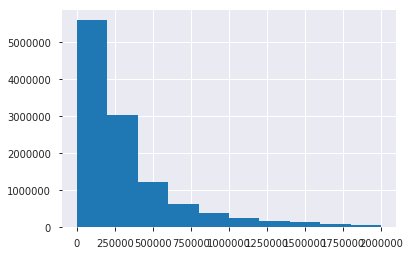

In [55]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['Cuota_cal']<2000000]['Cuota_cal'].hist()

### Revisar Calificación

In [64]:
Credivillas_total_clientes_activos_filtro[Credivillas_total_clientes_activos_filtro['ESTADO']=="A"]\
.pivot_table(index=['Fecha'], columns=['CALIFICACION_DEF'], values='SD_TOT_DEUDA', aggfunc=['sum', 'count'])


sum                                    \
CALIFICACION_DEF                 A                B                C    
Fecha                                                                   
201704           1958696996886.0000 42644974491.0000 28882550928.0000   
201705           1950901124828.0000 37216314686.0000 27447276082.0000   
201706           1987174649644.0000 36695511921.0000 24355821646.0000   
201707           1983038644090.0000 32303286221.0000 23052313555.0000   
201708           1993601783645.0000 33669496845.0000 23342231664.0000   
201709           2007333582149.0000 35424970130.0000 25577371962.0000   
201710           1991658001089.0000 31742676813.0000 24147389934.0000   
201711           2009387948539.0000 31451628699.0000 24554507878.0000   
201712           1984513079324.0000 32565751894.0000 19999195074.0000   
201801           1963027134076.0000 30780651815.0000 18521100025.0000   
201802           1981706629586.0000 33990038747.0000 18749767119.0000   
201803           1968659785209.0000 31749644783.0000 18161468267.0000   
201804           1985496882287.0000 31873757155.0000 19654505591.0000   
201805           1983668160239.0000 29283719613.0000 18473218843.0000   
201806           1959912423456.0000 44641669805.0000 22654360226.0000   
201807           1957319266731.0000 42138872987.0000 22957906829.0000   
201808           1974843535912.0000 42429062379.0000 23175415594.0000   
201809           1997525669418.0000 43111968332.0000 23665078116.0000   
201810           1998667380777.0000 42618107800.0000 22949850817.0000   
201811           2003285559031.0000 43804653245.0000 24322939246.0000   
201812           1987513380964.0000 40248448765.0000 22825112976.0000   
201901           1968878670919.0000 39212661482.0000 20840507345.0000   
201902           1966181789824.0000 38766786247.0000 19952117082.0000   
201903           1959733529658.0000 36770726181.0000 18805280807.0000   
201904           1958066976334.0000 36420709822.0000 17675894343.0000   

                                                     count                    \
CALIFICACION_DEF               D                E       A     B     C     D    
Fecha                                                                          
201704           8978563867.0000  2626386357.0000   167855  4090  2639  782    
201705           9428022527.0000  2460008284.0000   166328  3238  2374  770    
201706           8654059367.0000  2796627809.0000   168823  3329  2116  766    
201707           9166755963.0000  3327109036.0000   167558  2910  1973  776    
201708           10533114092.0000 3240957561.0000   167726  2994  2032  836    
201709           11395468072.0000 3572431781.0000   169085  3184  2252  881    
201710           12218809544.0000 4270410782.0000   167172  2879  2144  890    
201711           15871738253.0000 4680633235.0000   168726  2921  2161  1186   
201712           18166869707.0000 4773503124.0000   166818  2934  1809  1351   
201801           22331261786.0000 4654276584.0000   165907  2811  1704  1552   
201802           26344435250.0000 5175382675.0000   166995  3228  1817  1740   
201803           27237654668.0000 4757796171.0000   164895  2955  1807  1724   
201804           30333000218.0000 6332565109.0000   166343  2937  1854  1941   
201805           31158517245.0000 8016468763.0000   165448  2708  1718  1972   
201806           33233665476.0000 7195411621.0000   165035  3390  2017  2153   
201807           34485496208.0000 7077163288.0000   164356  3185  2004  2199   
201808           36150571424.0000 6873855967.0000   164566  3158  2026  2317   
201809           35684976534.0000 8537660721.0000   164858  3258  2077  2257   
201810           32735175933.0000 10132552722.0000  163737  3137  2003  2134   
201811           31235982996.0000 10947901054.0000  163708  3242  2091  2083   
201812           29822444426.0000 10264152819.0000  162000  3172  1870  1953   
201901           27413131394.0000 9785483950.0000   160858  3088  1

In [65]:
Credivillas_total_clientes_activos_filtro[(Credivillas_total_clientes_activos_filtro['ESTADO']=="A") & \
                                          (Credivillas_total_clientes_activos_filtro['Churn']==1)]\
.pivot_table(index=['Fecha'], columns=['CALIFICACION_DEF'], values='SD_TOT_DEUDA', aggfunc=['sum', 'count'])


sum                                  \
CALIFICACION_DEF               A               B               C    
Fecha                                                               
201704           43004472533.0000 1684330562.0000 1151629856.0000   
201705           30551520825.0000 1077403726.0000 807528871.0000    
201706           32299229237.0000 1480106121.0000 1298166575.0000   
201707           37356687081.0000 1009703806.0000 587935347.0000    
201708           32346639012.0000 1106680397.0000 756238769.0000    
201709           36179666818.0000 1404055267.0000 934151933.0000    
201710           32618953741.0000 1121035804.0000 500129825.0000    
201711           27290310501.0000 1150656567.0000 607361137.0000    
201712           27472632737.0000 637061007.0000  442478734.0000    
201801           32536432860.0000 666301842.0000  438868836.0000    
201802           35689745313.0000 919956438.0000  476582568.0000    
201803           34568809969.0000 709635740.0000  342154398.0000    
201804           36046816029.0000 826948155.0000  412238978.0000    
201805           29862474165.0000 614449563.0000  194109717.0000    
201806           30118037554.0000 724300015.0000  308000836.0000    
201807           42713126088.0000 374827749.0000  231206435.0000    
201808           35260214181.0000 585867847.0000  69315107.0000     
201809           39904710247.0000 530196599.0000  161718136.0000    
201810           32761659691.0000 532078656.0000  101973597.0000    
201811           34480389415.0000 535244834.0000  169539386.0000    
201812           31102951950.0000 217708143.0000  69930364.0000     
201901           40833551830.0000 427917699.0000  157164598.0000    
201902           37330897312.0000 358774259.0000  101984926.0000    
201903           37981466129.0000 383367973.0000  119149465.0000    

                                               count                    
CALIFICACION_DEF             D              E     A    B    C   D   E   
Fecha                                                                   
201704           509278047.0000 115066833.0000  5156  202  109  54  27  
201705           387629675.0000 128114237.0000  4046  117  83   29  18  
201706           337147065.0000 46452264.0000   4370  174  109  40  21  
201707           208876716.0000 222363696.0000  4757  121  77   42  20  
201708           143356351.0000 38063097.0000   4210  98   70   29  6   
201709           521966935.0000 168110252.0000  4826  151  91   50  24  
201710           216169892.0000 122679097.0000  4375  107  61   22  24  
201711           831862224.0000 184584519.0000  3777  112  74   43  22  
201712           606413446.0000 408856816.0000  3564  75   61   44  27  
201801           353171541.0000 18484496.0000   3816  85   47   44  15  
201802           471108268.0000 92546224.0000   4284  117  57   54  20  
201803           495768687.0000 172295708.0000  4207  83   40   41  16  
201804           510657603.0000 293437126.0000  4308  90   67   42  22  
201805           263042547.0000 231580776.0000  3525  56   32   27  38  
201806           194325407.0000 208755005.0000  3711  81   41   24  23  
201807           241952300.0000 189207890.0000  4615  48   30   28  17  
201808           185357049.0000 63461211.0000   4263  55   25   25  13  
201809           215544037.0000 118373458.0000  4641  59   28   21  11  
201810           216346383.0000 250176394.0000  3875  64   12   19  18  
201811           147398983.0000 145475767.0000  3943  48   18   20  16  
201812           68759072.0000  87250935.0000   3736  35   18   10  6   
201901           61443919.0000  46325289.0000   4106  39   12   11  10  
201902           177597765.0000 83315912.0000   4044  39   18   10  13  
201903           111668113.0000 67829368.0000   4060  36   11   11  14

In [66]:
Credivillas_total_clientes_activos_filtro[(Credivillas_total_clientes_activos_filtro['ESTADO']=="A") & \
                                          (Credivillas_total_clientes_activos_filtro['Cancelación']==1)]\
.pivot_table(index=['Fecha'], columns=['CALIFICACION_DEF'], values='SD_TOT_DEUDA', aggfunc=['sum', 'count'])


sum                                  \
CALIFICACION_DEF               A               B               C    
Fecha                                                               
201704           43659182025.0000 1709714229.0000 1168118364.0000   
201705           31191573242.0000 1110171254.0000 819502596.0000    
201706           33027049212.0000 1509313027.0000 1308777532.0000   
201707           38159189897.0000 1024189746.0000 597352217.0000    
201708           32987092677.0000 1129874908.0000 763024828.0000    
201709           36891840692.0000 1430685668.0000 941774238.0000    
201710           33303305836.0000 1141512674.0000 512259217.0000    
201711           27922742805.0000 1164424496.0000 617367321.0000    
201712           28393045460.0000 655697631.0000  455602800.0000    
201801           33213128288.0000 676962492.0000  442680610.0000    
201802           36391792457.0000 933852002.0000  483471150.0000    
201803           35310044145.0000 736301495.0000  350832810.0000    
201804           36820308911.0000 841814873.0000  425303695.0000    
201805           30610184767.0000 622406467.0000  199216849.0000    
201806           30932851841.0000 748060003.0000  319612029.0000    
201807           43620317218.0000 395006375.0000  238020172.0000    
201808           36108283963.0000 594251489.0000  77673234.0000     
201809           40906295726.0000 542987716.0000  176092322.0000    
201810           33595501595.0000 552092147.0000  108470857.0000    
201811           35362569209.0000 551829258.0000  181343077.0000    
201812           31864156392.0000 230239633.0000  74997012.0000     
201901           41598580474.0000 442464841.0000  160540528.0000    
201902           38260250714.0000 368101875.0000  113544318.0000    
201903           38814239744.0000 398588250.0000  123721116.0000    

                                               count                    
CALIFICACION_DEF             D              E     A    B    C   D   E   
Fecha                                                                   
201704           513338001.0000 129503429.0000  6767  246  142  59  38  
201705           388567750.0000 130016253.0000  5553  168  108  36  28  
201706           339872158.0000 48229141.0000   6057  225  139  47  31  
201707           212162491.0000 224379732.0000  6515  173  101  45  28  
201708           144066687.0000 44728889.0000   5792  132  89   34  14  
201709           524874351.0000 170914735.0000  6400  195  109  54  32  
201710           217284956.0000 124092446.0000  5898  148  87   27  31  
201711           833899288.0000 186298117.0000  5313  159  101  49  32  
201712           609400267.0000 410985217.0000  4900  120  83   49  35  
201801           354515580.0000 24381281.0000   5152  116  58   47  25  
201802           475006653.0000 96081876.0000   5719  150  76   64  27  
201803           497736527.0000 174931498.0000  5684  121  69   47  27  
201804           514552804.0000 299052864.0000  5866  124  91   48  31  
201805           269206084.0000 234736202.0000  4919  83   48   41  53  
201806           212067355.0000 212383130.0000  5309  130  58   33  38  
201807           243935957.0000 191022734.0000  6281  82   51   38  29  
201808           191670534.0000 65459376.0000   5839  87   49   34  18  
201809           220642218.0000 121985361.0000  6547  101  62   26  24  
201810           222281390.0000 255662014.0000  5493  101  33   27  28  
201811           149541015.0000 151626877.0000  5733  94   46   27  33  
201812           69871034.0000  88502880.0000   5181  74   33   16  15  
201901           62516865.0000  46859184.0000   5488  73   24   16  15  
201902           181227902.0000 84892627.0000   5672  68   35   20  20  
201903           113025441.0000 68618675.0000   5584  68   20   17  23